In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as fit
import seaborn as sns
import matplotlib.scale as mscale

In [7]:
# 1.1 Load data
data = pd.read_csv('global_air_quality.csv')
data

,IndicatorCode,Indicator,ValueType,ParentLocationCode,ParentLocation,Location type,SpatialDimValueCode,Location,Period type,Period,...,FactValueUoM,FactValueNumericLowPrefix,FactValueNumericLow,FactValueNumericHighPrefix,FactValueNumericHigh,Value,FactValueTranslationID,FactComments,Language,DateModified
0,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2019,...,NaN,NaN,6.29,NaN,13.74,10.01 [6.29-13.74],NaN,NaN,EN,2022-08-12 00:00:00
1,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2019,...,NaN,NaN,7.44,NaN,12.55,10.02 [7.44-12.55],NaN,NaN,EN,2022-08-12 00:00:00
2,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,EUR,Europe,Country,GBR,United Kingdom of Great Britain and Northern I...,Year,2019,...,NaN,NaN,9.73,NaN,10.39,10.06 [9.73-10.39],NaN,NaN,EN,2022-08-12 00:00:00
3,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,GRD,Grenada,Year,2019,...,NaN,NaN,7.07,NaN,13.20,10.08 [7.07-13.20],NaN,NaN,EN,2022-08-12 00:00:00
4,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BRA,Brazil,Year,2019,...,NaN,NaN,8.23,NaN,12.46,10.09 [8.23-12.46],NaN,NaN,EN,2022-08-12 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9445,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,BLZ,Belize,Year,2010,...,NaN,NaN,3.91,NaN,20.28,9.92 [3.91-20.28],NaN,NaN,EN,2022-08-12 00:00:00
9446,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,TTO,Trinidad and Tobago,Year,2010,...,NaN,NaN,7.80,NaN,12.89,9.92 [7.80-12.89],NaN,NaN,EN,2022-08-12 00:00:00
9447,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AFR,Africa,Country,KEN,Kenya,Year,2010,...,NaN,NaN,6.30,NaN,13.57,9.94 [6.30-13.57],NaN,NaN,EN,2022-08-12 00:00:00
9448,SDGPM25,Concentrations of fine particulate matter (PM2.5),text,AMR,Americas,Country,USA,United States of America,Year,2010,...,NaN,NaN,9.78,NaN,10.11,9.95 [9.78-10.11],NaN,NaN,EN,2022-08-12 00:00:00


In [9]:
# 1.2 Make a new column
data['PM25_Value'] = data['FactValueNumeric']
print(data[['FactValueNumeric', 'PM25_Value']])

      FactValueNumeric  PM25_Value
0                10.01       10.01
1                10.02       10.02
2                10.06       10.06
3                10.08       10.08
4                10.09       10.09
...                ...         ...
9445              9.92        9.92
9446              9.92        9.92
9447              9.94        9.94
9448              9.95        9.95
9449             92.79       92.79

[9450 rows x 2 columns]


In [61]:
# 1.3 Calculate average PM2.5 concentration
averages = data.groupby('ParentLocation')['PM25_Value'].mean()
averages

ParentLocation
Africa                   29.812282
Americas                 14.645728
Eastern Mediterranean    38.403682
Europe                   19.244727
South-East Asia          32.145796
Western Pacific          15.497559
Name: PM25_Value, dtype: float64

In [67]:
data['Average_PM25'] = data.groupby('ParentLocation')['PM25_Value'].transform('mean')
print(data[['Location', 'ParentLocation', 'PM25_Value','Average_PM25']])

                                               Location  \
0                                                 Kenya   
1                                   Trinidad and Tobago   
2     United Kingdom of Great Britain and Northern I...   
3                                               Grenada   
4                                                Brazil   
...                                                 ...   
9445                                             Belize   
9446                                Trinidad and Tobago   
9447                                              Kenya   
9448                           United States of America   
9449                                        Afghanistan   

             ParentLocation  PM25_Value  Average_PM25  
0                    Africa       10.01     29.812282  
1                  Americas       10.02     14.645728  
2                    Europe       10.06     19.244727  
3                  Americas       10.08     14.645728  
4          

In [69]:
# 1.4 Analyze Data
# The Eastern Mediterranean continent has the highest average air pollution.
# I suppose this is not that surprising, due to the region's role in the energy and transportation sectors of the economy.

In [77]:
# 1.5 Save processed data
processed = data[['Location', 'ParentLocation', 'PM25_Value','Average_PM25']]
processed.to_csv('hw7_processed_data.csv')

In [92]:
planets = sns.load_dataset('planets')
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


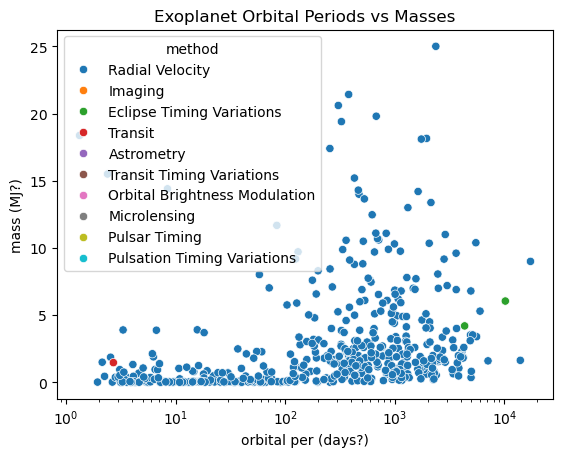

In [142]:
# 2.1 Scatter plot
plt.figure()
scatter = sns.scatterplot(data=planets, x="orbital_period", y="mass", hue="method")
scatter.set_xscale('log')
scatter.set_title('Exoplanet Orbital Periods vs Masses')
scatter.set_xlabel('orbital per (days?)')
scatter.set_ylabel('mass (MJ?)')
plt.show()

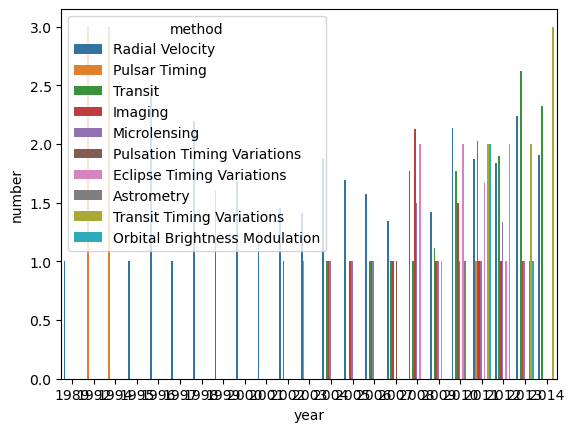

In [156]:
#2.2 Bar chart
bar = sns.barplot(planets, x="year", y='number', hue='method', errorbar=None)

Text(0, 0.5, '# Exoplanets Discovered')

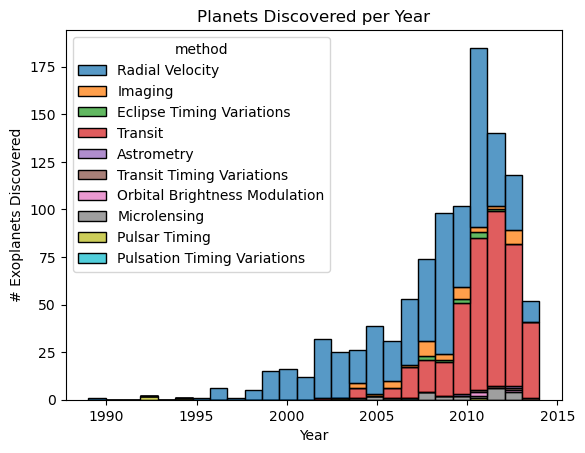

In [166]:
# take 2
bar = sns.histplot(data=planets, x=planets['year'], hue=planets['method'], multiple='stack')
bar.set_title('Planets Discovered per Year')
bar.set_xlabel('Year')
bar.set_ylabel('# Exoplanets Discovered')